#### Goal: predict if a passenger survived the sinking of the Titanic or not. For each in the test set, you must predict a 0 or 1 value for the variable.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
train=pd.read_csv('/Users/angelawu/Documents/Kaggle/train.csv')
test=pd.read_csv('/Users/angelawu/Documents/Kaggle/test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


1. Total no. of rows: 891 for train and 418 for test dataset.
2. We need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them. 
3. There are missing values in some features. 

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There are 38.3% survived in the train data set. We can also see that the passenger ages range from 0.4 to 80.

In [6]:
df=pd.concat([train,test])

## EDA

### Missing data

In [7]:
missing=df.isnull().sum()
missing_pct=df.isnull().sum()/len(df)
missing_data=pd.DataFrame({'total_missing':missing,'missing_pct':missing_pct})
missing_data.sort_values(by='missing_pct',ascending=False)

,total_missing,missing_pct
Cabin,1014,0.774637
Survived,418,0.319328
Age,263,0.200917
Embarked,2,0.001528
Fare,1,0.000764
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000


Since Cabin:data missing>70%,this data field can be ignored or its better to derive other features from this feature.

### Correlation between numerical features 

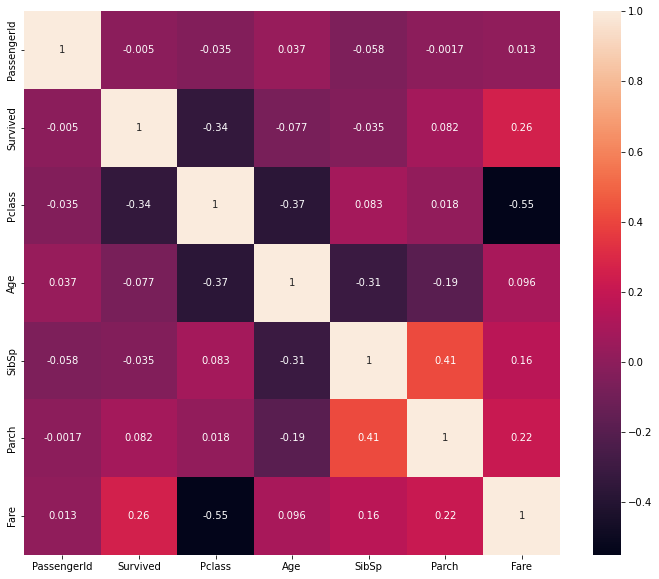

In [8]:
plt.figure(figsize=(12,10))
corr=train.corr()
sns.heatmap(corr,annot=True)
plt.show()

#### Which features affect the chance of a passenger's survival?

#### Survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

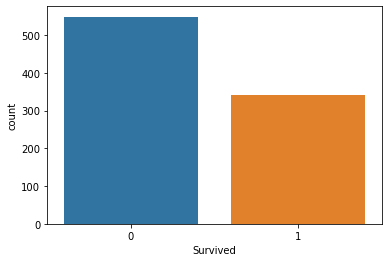

In [9]:
sns.countplot(x='Survived',data=train)

It's not the imbalanced data.

#### Plcass

Text(0.5, 1.0, 'Mean Survived Rate vs. Pclass')

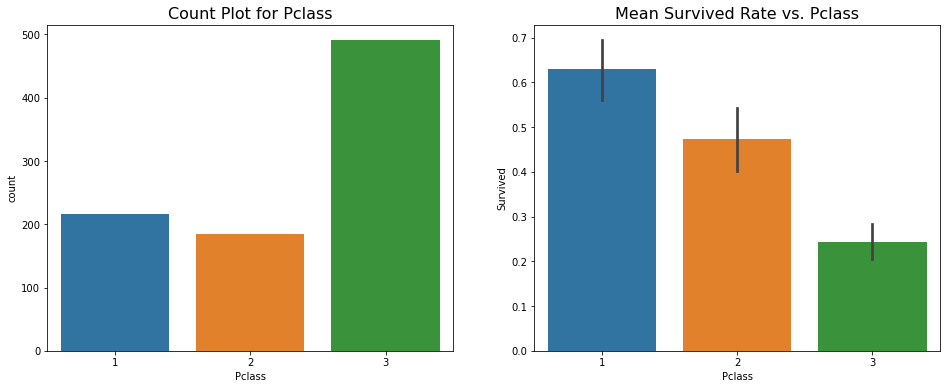

In [10]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,6))
sns.countplot(x='Pclass',data=train,ax=ax[0])
sns.barplot(x='Pclass',y='Survived',data=train,ax=ax[1])
ax[0].set_title('Count Plot for Pclass',fontsize=16)
ax[1].set_title('Mean Survived Rate vs. Pclass',fontsize=16)

1. Passengers in Pclass 1 (Upper class) are more likely to survive.
2. Pclass is a good feature for prediction of survival.

#### Sex

Text(0.5, 1.0, 'Mean Survived Rate vs. Sex')

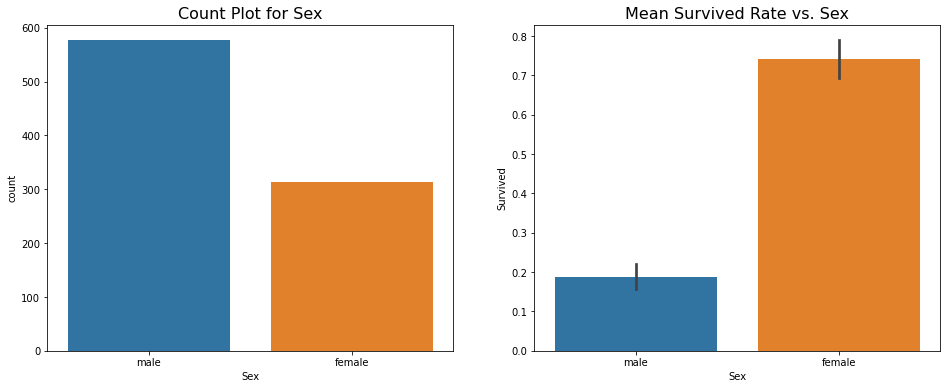

In [11]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,6))
sns.countplot(x='Sex',data=train,ax=ax[0])
sns.barplot(x='Sex',y='Survived',data=train,ax=ax[1])
ax[0].set_title('Count Plot for Sex',fontsize=16)
ax[1].set_title('Mean Survived Rate vs. Sex',fontsize=16)

1. Proportion of male and female: ~2/3 vs ~1/3
2. Male is much less likely to survive, with only 20% chance of survival. For female, >70% chance of survival.
3. Sex is an important feature to predict survival.

#### Age 

/Users/angelawu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Survived', ylabel='Age'>

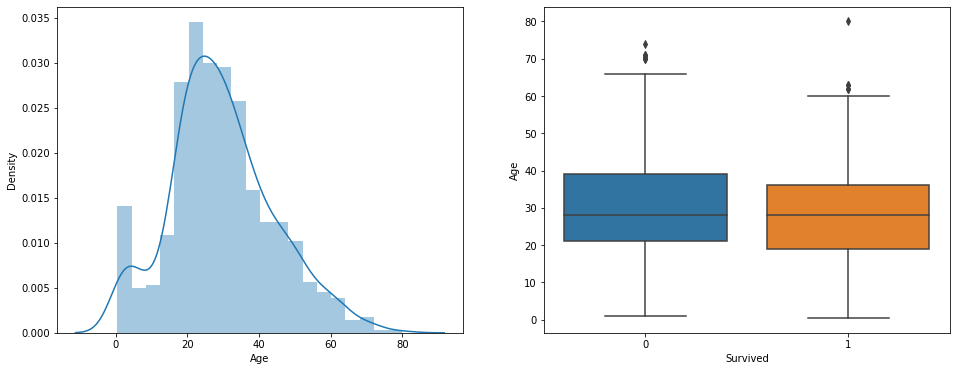

In [12]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,6))
sns.distplot(train['Age'],ax=ax[0])
sns.boxplot(x='Survived',y='Age',data=train)

1. Passengers are mainly aged 20–40.
2. Younger passengers tends to survive.

#### SibSp 

Text(0.5, 1.0, 'Mean Survived Rate vs. Sibsp')

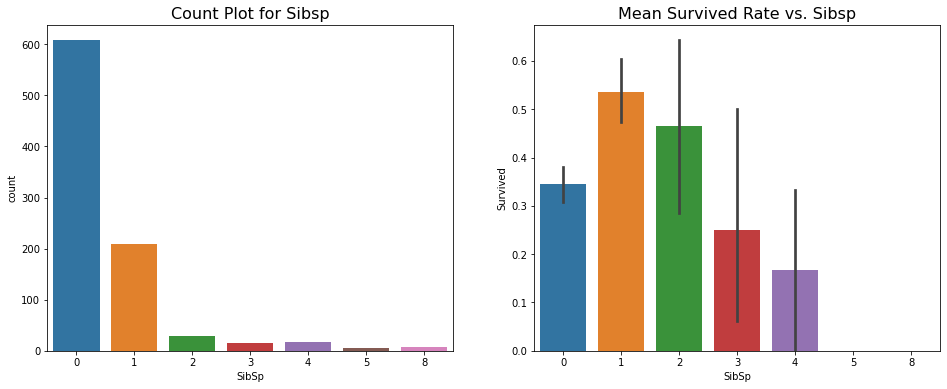

In [13]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,6))
sns.countplot(x='SibSp',data=train,ax=ax[0])
sns.barplot(x='SibSp',y='Survived',data=train,ax=ax[1])
ax[0].set_title('Count Plot for Sibsp',fontsize=16)
ax[1].set_title('Mean Survived Rate vs. Sibsp',fontsize=16)

1. Passengers having 1 sibling spouse are more likely to survive compared to those not.
2. For those more than 1 siblings spouses, the information is insufficient to provide any insight.

#### Parch

Text(0.5, 1.0, 'Mean Survived Rate vs. Parch')

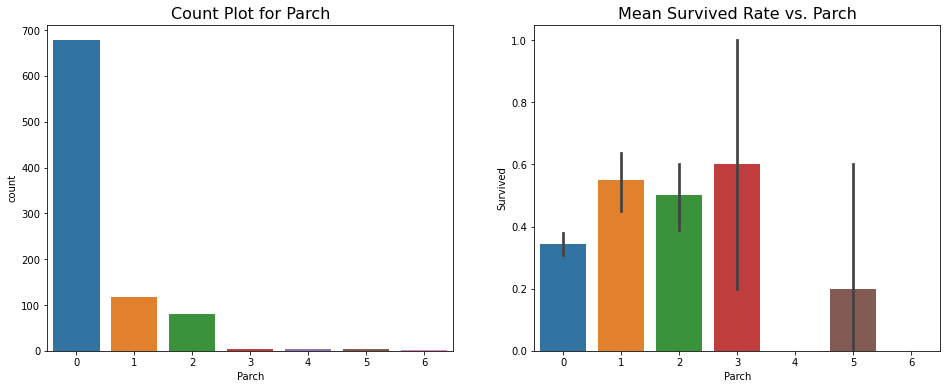

In [14]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,6))
sns.countplot(x='Parch',data=train,ax=ax[0])
sns.barplot(x='Parch',y='Survived',data=train,ax=ax[1])
ax[0].set_title('Count Plot for Parch',fontsize=16)
ax[1].set_title('Mean Survived Rate vs. Parch',fontsize=16)

1. more than 70% passengers travel without parents/children.
2. Passengers travelling with parents/children are more likely to survive than those not.

#### Fare

/Users/angelawu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

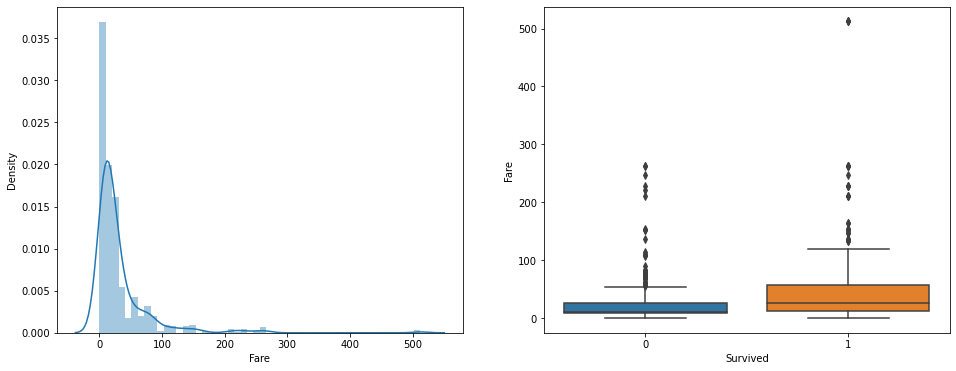

In [15]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,6))
sns.distplot(train['Fare'],ax=ax[0])
sns.boxplot(x='Survived',y='Fare',data=train,ax=ax[1])

1. The distribution is right-skewed. Outliers are observed.
2. For those who survived, their fares are relatively higher.

#### Embarked

Text(0.5, 1.0, 'Mean Survived Rate vs. Embarked')

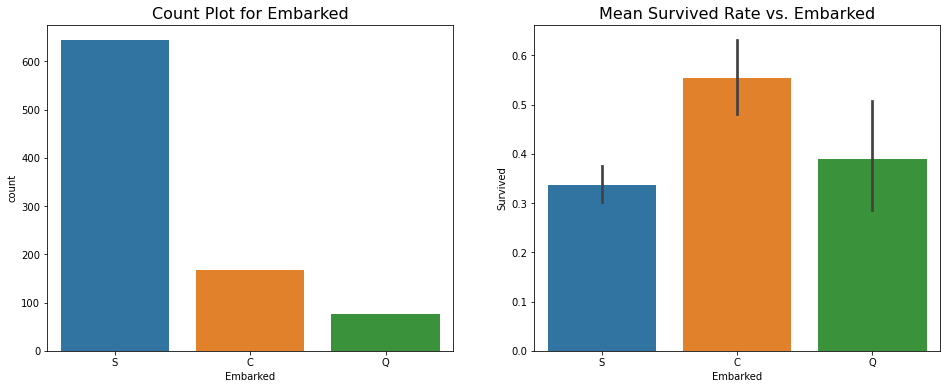

In [16]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,6))
sns.countplot(x='Embarked',data=train,ax=ax[0])
sns.barplot(x='Embarked',y='Survived',data=train,ax=ax[1])
ax[0].set_title('Count Plot for Embarked',fontsize=16)
ax[1].set_title('Mean Survived Rate vs. Embarked',fontsize=16)

1. More than 2/3 passengers embarked at Port C.
2. Passengers embarked at Port C are more likely to survive.

### Data Preprocessing

##### Impute missing values

###### 1. Age

In [17]:
df.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [18]:
df['Title']=df['Name'].str.split(',').str.get(1).str.split('.').str.get(0).str.strip()

In [19]:
df['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

The common titles are(Mr/Miss/Mrs/Master). Some of the titles (Ms/Lady/Sir…etc.) can be grouped to the common titles. The remaining unclassified titles can be frouped to “Others”.

In [20]:
common_title=['Mr','Miss','Mrs','Master']
df['Title']=df['Title'].replace(['Ms', 'Mlle', 'Mme'], 'Miss')
df['Title']=df['Title'].replace('Lady', 'Mrs')  
df['Title']=df['Title'].replace(['Sir', 'Rev'], 'Mr')
df.loc[~df['Title'].isin(common_title),'Title']='Others'
                        

In [21]:
df['Title'].value_counts()

Mr        766
Miss      265
Mrs       198
Master     61
Others     19
Name: Title, dtype: int64

In [22]:
title_median=df.groupby('Title')['Age'].median()

In [23]:
#impute the age missing value according to the title 
for i in title_median.index:
    df['Age'][(df['Age'].isna())&(df['Title']==i)]=title_median[i]


/var/folders/zt/hfwnrnh110q_vcpvn0nwl3qc0000gn/T/ipykernel_99996/780315062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][(df['Age'].isna())&(df['Title']==i)]=title_median[i]
/var/folders/zt/hfwnrnh110q_vcpvn0nwl3qc0000gn/T/ipykernel_99996/780315062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][(df['Age'].isna())&(df['Title']==i)]=title_median[i]
/var/folders/zt/hfwnrnh110q_vcpvn0nwl3qc0000gn/T/ipykernel_99996/780315062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

##### Embarked

For train dataset, there are only 2 missing values. Simply impute the mode

In [24]:
df['Embarked'].fillna(df['Embarked'].mode,inplace=True)

##### Fare

For test dataset, there is only 1 missing value. Simply impute the median,

In [25]:
df['Fare'].fillna(df['Fare'].median(),inplace=True)

Since ticket, PassengerId, Name are not providing the import information for prediction, we will drop those data fields. 

#### Feature creation

##### SibSp and Parch

Since both features are highly positively correlated (0.41) we can derive a single feature indicative of the number of family members accompanying the passenger by adding the number of spouse/siblings (SibSp) and number of parents/children (Parch) aboard.

In [26]:
df['family_size']=df['SibSp']+df['Parch']+1

/Users/angelawu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/angelawu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1.5)

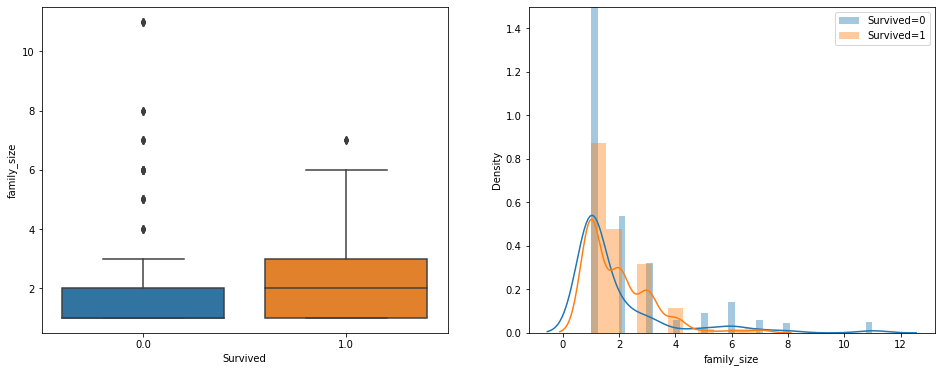

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.boxplot(x='Survived',y='family_size',data=df,ax=ax[0])
sns.distplot(df[df['Survived']==0]['family_size'],label='Survived=0',ax=ax[1])
sns.distplot(df[df['Survived']==1]['family_size'],label='Survived=1',ax=ax[1])
ax[1].legend()
ax[1].set_ylim(0, 1.5)

1. From the boxplot, those who survived had a median of around 1 family member, while those who did not had, had lesser or no family
2. From the probability distribution, both the distributions resemble normal distributions with a slight right skew
3. Lesser the count of family members, higher the chance that passenger did not survive

In [28]:
df_2=df.drop(['SibSp','Parch'],axis=1)

##### Title

Title is created for the imputation missing values of Age. It can also be used as a new features.

/Users/angelawu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Title', ylabel='Survived'>

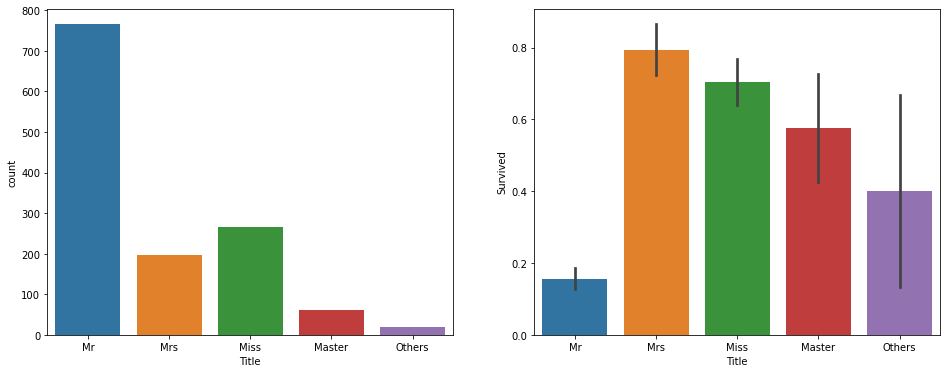

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(df_2['Title'],ax=ax[0])
sns.barplot(x='Title',y='Survived',data=df_2,ax=ax[1])

It is obviously that Title Mr. is much less likely to survive compared to others

In [30]:
df_3=df_2.drop('Name',axis=1)

#### Binning numeric features into categories

##### Age

In [31]:
df_3['Age_bin']=pd.qcut(df_3['Age'],5)

<AxesSubplot:xlabel='Age_bin', ylabel='Survived'>

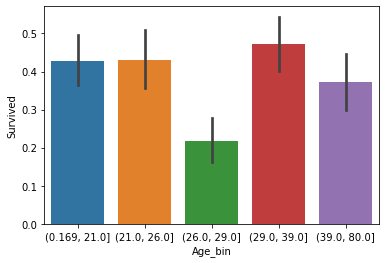

In [32]:
sns.barplot(x='Age_bin',y='Survived',data=df_3)

##### Fare

In [33]:
df_3['fare_bin']=pd.qcut(df_3['Fare'],5)

<AxesSubplot:xlabel='fare_bin', ylabel='Survived'>

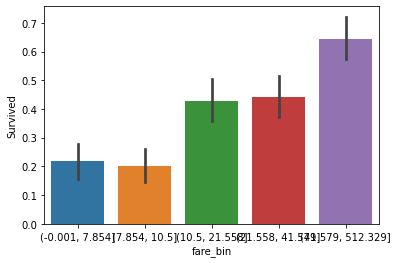

In [34]:
sns.barplot(x='fare_bin',y='Survived',data=df_3)

#### Convert categorical variables to numeric

In [35]:
cat_feature=['Sex','Embarked','Title','Age_bin','fare_bin']
df_4=pd.get_dummies(data=df_3,columns=cat_feature)

#### Drop unused columns

In [36]:
drop_list=['PassengerId','Age','Ticket','Fare','Cabin']
df_5=df_4.drop(drop_list,axis=1)

In [37]:
train_df=df_5[:len(train)]
test_df=df_5[len(train):].drop('Survived',axis=1)

## Model building

In [38]:
X_train=train_df.drop('Survived',axis=1)
y_train=train_df['Survived']
X_test=test_df

### Hyperparameter tunning on Logistic regression

In [39]:
lr=LogisticRegression()
lr_param_grid={"penalty" : ["l2"],
              "tol" : [0.0001,0.0002,0.0003],
              "max_iter": [100,200,300],
              "C" :[0.01, 0.1, 1, 10, 100],
              "intercept_scaling": [1, 2, 3, 4],
              "solver":['liblinear'],
              "verbose":[1]}
lr_grid=GridSearchCV(lr,param_grid=lr_param_grid,cv=5,scoring='roc_auc',n_jobs=-1,verbose=1)
lr_grid.fit(X_train,y_train)
lr_grid.best_estimator_

Fitting 5 folds for each of 180 candidates, totalling 900 fits
iter  1 act 1.002e+00 pre 9.709e-01 delta 7.892e-01 f 4.942e+00 |g| 4.159e+00 CG   3
iter  2 act 1.109e-02 pre 1.100e-02 delta 7.892e-01 f 3.940e+00 |g| 3.946e-01 CG   3
iter  3 act 5.384e-05 pre 5.384e-05 delta 7.892e-01 f 3.929e+00 |g| 1.432e-02 CG   4
iter  4 act 3.090e-08 pre 3.090e-08 delta 7.892e-01 f 3.929e+00 |g| 3.302e-04 CG   3
iter  1 act 1.034e+00 pre 9.990e-01 delta 7.883e-01 f 4.935e+00 |g| 4.203e+00 CG   3
iter  2 act 1.128e-02 pre 1.117e-02 delta 7.883e-01 f 3.901e+00 |g| 4.072e-01 CG   3
iter  3 act 5.067e-05 pre 5.066e-05 delta 7.883e-01 f 3.890e+00 |g| 1.487e-02 CG   4
iter  4 act 3.018e-08 pre 3.018e-08 delta 7.883e-01 f 3.890e+00 |g| 3.107e-04 CG   3
iter  1 act 1.001e+00 pre 9.695e-01 delta 7.905e-01 f 4.942e+00 |g| 4.181e+00 CG   3
iter  2 act 1.168e-02 pre 1.158e-02 delta 7.905e-01 f 3.941e+00 |g| 4.024e-01 CG   3
iter  3 act 6.564e-05 pre 6.563e-05 delta 7.905e-01 f 3.929e+00 |g| 1.609e-02 CG   4
it

LogisticRegression(C=1, intercept_scaling=2, solver='liblinear', tol=0.0002,
                   verbose=1)

In [40]:
lr_grid.best_score_

0.8655562890928573

### Hyperparameter tunning on Random Forest

In [65]:
rf=RandomForestClassifier()
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]}
rf_grid=GridSearchCV(rf,param_grid=rf_param_grid,cv=5,scoring='roc_auc',n_jobs=-1,verbose=1)
rf_grid.fit(X_train,y_train)
rf_best=rf_grid.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [66]:
rf_grid.best_score_

0.867438413085073

### Feature importance 

<AxesSubplot:>

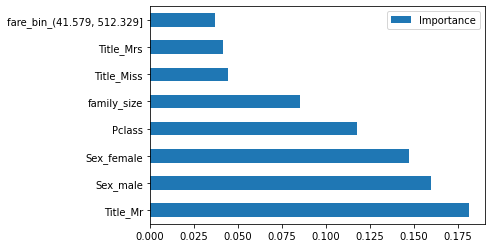

In [70]:
fi_df=pd.DataFrame(rf_best.feature_importances_,index=X_train.columns,columns=['Importance'])
fi_df.sort_values(by='Importance',ascending=False,inplace=True)
fi_df[:8].plot(kind='barh')

### Model prediction

In [75]:
prediction=rf_grid.predict(X_test)
# prediction1=rf_grid.best_estimator_.predict(X_test)